<a href="https://colab.research.google.com/github/sera0911/asia_ai_study/blob/main/New_MachinLearning/exam_13_auto_encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 사진을 압축했다가 복원과정에서 해상도가 깨지지 않게 모델 생성

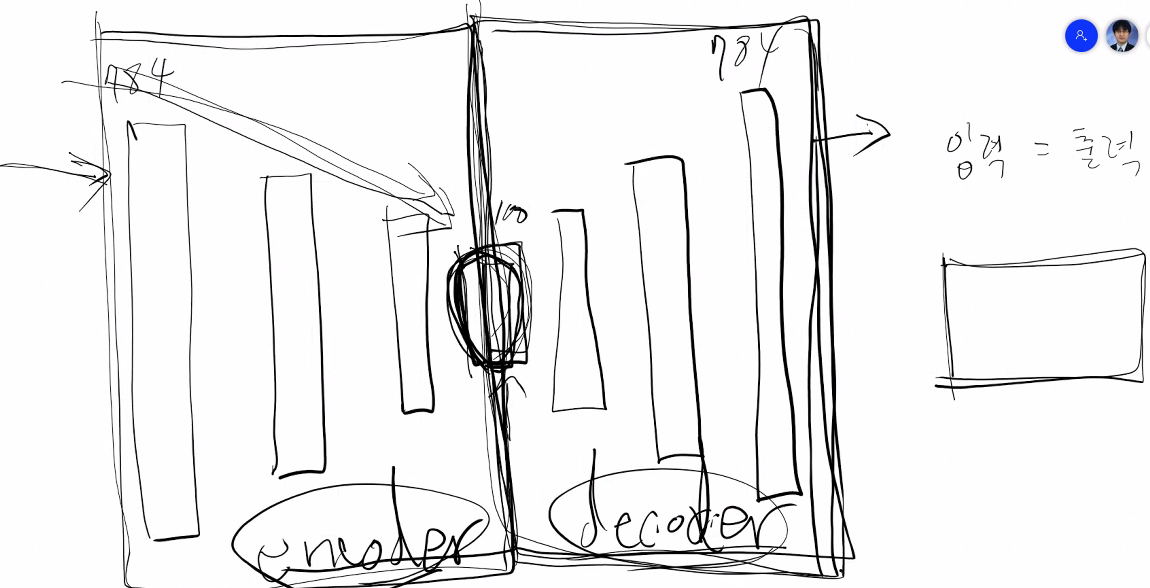

In [ ]:
#모듈 임포트

import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import mnist

### 인코딩, 디코딩을 하는 하나의 모델 생성

In [ ]:
#오토 모델 레이어 생성
input_img = Input(shape=(784, ))  #입력이 784

encoded = Dense(32, activation='relu')(input_img)  #Dense레이어 만들 때 앞에 인풋레이어를 받아서 만들어진 것(784바이트를 받아서 32바이트로 압축)
decoded = Dense(784, activation='sigmoid')(encoded)  #encoded를 받아서 만든 Dense레이어 (32바이트를 받아서 784바이트로 출력), 입력값을 스케일링해 0~1사이로 지정할 거여서 sigmoid를 사용

autoencoder = Model(input_img, decoded)

In [ ]:
#오토 모델 레이어 보기
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


### 만들어진 모델을 둘로 쪼갬

In [ ]:
#엔코더 모델만 따로 보기(오토인코더 중 앞부분)

encoder = Model(input_img, encoded)
encoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#디코더 모델만 따로 보기(오토인코더 중 뒷부분)

encoded_input = Input(shape=(32,))  #엔코딩된 인풋은 32바이트
decoder_layer = autoencoder.layers[-1]  #-1은 제일 autoencoder의 마지막 출력 레이어
decoder = Model(encoded_input, decoder_layer(encoded_input))  #엔코더의 32바이트를 입력받아서 디코더의 784를 받아서 만듬
decoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
_________________________________________________________________


오토인코더는 따로 모델은 하나로 앞에가 엔코더, 뒤에가 디코더로 이루어져있음  
학습은 오토인코더로 학습시킨다

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')  #입력데이터를 정답데이터로 사용

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data() 

11493376/11490434 [==============================] - 0s 0us/step


x는 784가 인풋데이터 = 나오는 결과도 784개의 데이터가 나와야해서 y값은 필요없으니 _로 작성 = y값이 없으니 비지도학습

### 데이터 전처리

In [ ]:
#데이터 스케일링

x_train = x_train.astype('float32') /255   #32비트 float변수로 바꿔서 나누기
x_test = x_test.astype('float32') / 255
flatted_x_train = x_train.reshape(-1, 28 * 28)  #28*28 = 784
flatted_x_test = x_test.reshape(-1, 28 * 28)

print(flatted_x_train.shape)
print(flatted_x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
#모델 학습(입력데이터가 정답으로 나와야해서 x로만 학습)

fit_hist = autoencoder.fit(flatted_x_train, flatted_x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(flatted_x_test, flatted_x_test))

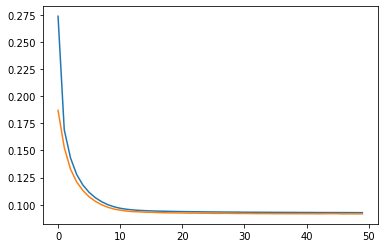

In [ ]:
#이미지로 표현

plt.plot(fit_hist.history['loss'])
plt.plot(fit_hist.history['val_loss'])

In [ ]:
#autoencoder에 predict 시키는 것과 동일한 방식으로 엔코드와 디코드 예측해주기

encoded_img = encoder.predict(x_test[:10].reshape(-1, 784))
decoded_img = decoder.predict(encoded_img)

<Figure size 432x288 with 0 Axes>

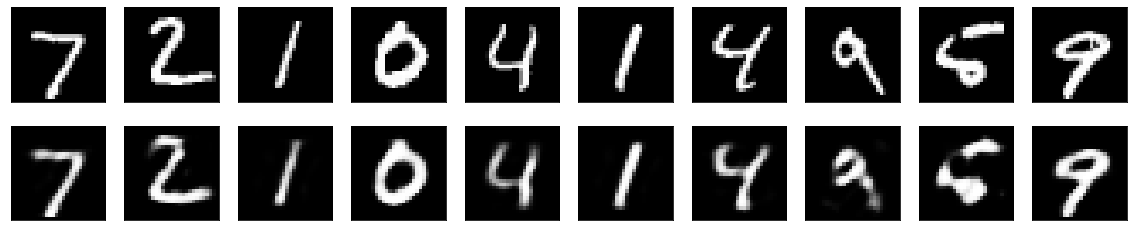

In [ ]:
#모델 학습은 한 번에 하되 모델을 쪼개서 사용할 수 있다, 모델 예측시 오토뿐만 아니라 엔코더와 디코더로 따로 동작이 가능하기에 동작 확인해보기 

n = 10  #0~9번 이미지
plt.gray()   #색깔을 흑백모드로 바꿔준 것
plt.figure(figsize=(20, 4))  #figsize= 전체 이미지 사이즈 지정해주기

for i in range(n):
    ax = plt.subplot(2, n, i+1)  #subplot= plt안에 들어가는 작은 plot=행의 개수=2, 컬럼개수=n=10, 마지막 i+1은 자리를 표현해서 1을 더해준 것은 i가 0부터 시작하니까 1을 추가(첫자리부터 출력)
    plt.imshow(x_test[i])  #plt출력하기
    ax.get_xaxis().set_visible(False)  #원래 plot그릴 때 x,y를 눈금으로 보여주는 데(좌표) 여기선 필요없어서 set_visible=false로 보이지 않게 해준다(true로 하면 눈금이 보인다)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+1+n)  #두번째 줄에 출력시 자리수가 11번째로 들어가야해서 n+1
    plt.imshow(decoded_img[i].reshape(28, 28))  #엔코더, 디코더를 거친 이미지를 출력, reshape는 784로 배열된 것을 다시 28, 28형태로 변환(32바이트로 줄였다-압축, 다시 복원한 것)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

#결과 첫줄은 기본 0~9번 이미지를 가져온다
#아랫줄은 32비트로 압축됐다가 다시 디코더해준 이미지를 가져온 것

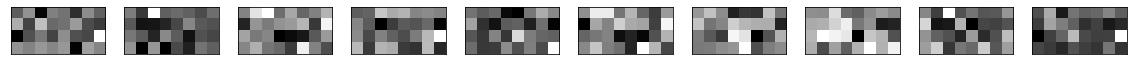

In [ ]:
# 인코딩된 후 이미지

n = 10  

plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(encoded_img[i].reshape(4, 8))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [ ]:
#해상도가 낮아졌기에 모델을 좀 키워서 해상도 올려보기

input_img = Input(shape=(784,))

#엔코더 레이어를 3개로 늘려보고 바이트도 784에서 128-64-32로 차츰 줄여주기
encoded = Dense(128, activation='relu')(input_img)  
encoded = Dense(64, activation='relu')(encoded)  #encoded를 받아서 다시 덮어쓰기
encoded = Dense(32, activation='relu')(encoded)

#디코더 레이어도 3개로 늘려 엔코더로 줄인 걸 디코더로 차츰 늘리기
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)  #decoded를 받아서 다시 덮어쓰기
decoded = Dense(784, activation='sigmoid')(decoded)

In [ ]:
#autoencoder로 만들기

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

#summary결과 dense3까지는 인코더 , 4는 엔코더이자 디코더, 4~7까지는 디코더 

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_7 (Dense)              (None, 784)               1011

In [ ]:
#변경된 encoder레이어 보기

encoder = Model(input_img, encoded)
encoder.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.fit(flatted_x_train, flatted_x_train, epochs=100, batch_size=256, validation_data=(flatted_x_test, flatted_x_test))

In [ ]:
# 결과 확인
decoded_img = autoencoder.predict(flatted_x_test)

<Figure size 432x288 with 0 Axes>

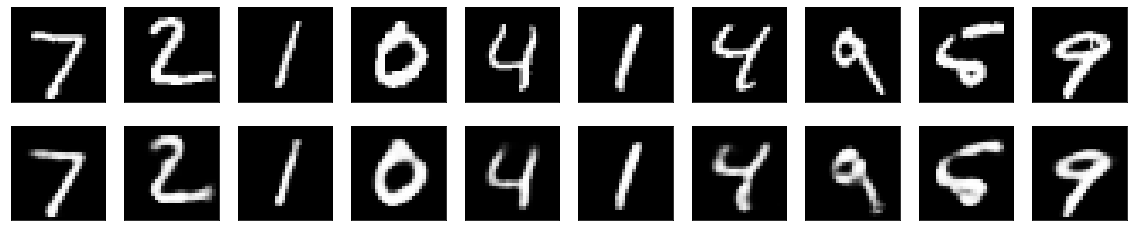

In [ ]:

#해상도 높인 모델로 다시 plt그려보기

n = 10  #0~9번 이미지
plt.gray()   #색깔을 흑백모드로 바꿔준 것
plt.figure(figsize=(20, 4))  #figsize= 전체 이미지 사이즈 지정해주기

for i in range(n):
    ax = plt.subplot(2, 10, i+1)  #subplot= plt안에 들어가는 작은 plot=행의 개수=2, 컬럼개수=n=10, 마지막 i+1은 자리를 표현해서 1을 더해준 것은 i가 0부터 시작하니까 1을 추가(첫자리부터 출력)
    plt.imshow(x_test[i])  #plt출력하기
    ax.get_xaxis().set_visible(False)  #원래 plot그릴 때 x,y를 눈금으로 보여주는 데(좌표) 여기선 필요없어서 set_visible=false로 보이지 않게 해준다(true로 하면 눈금이 보인다)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+1+n)  #두번째 줄에 출력시 자리수가 11번째로 들어가야해서 n+1
    plt.imshow(decoded_img[i].reshape(28, 28))  #엔코더, 디코더를 거친 이미지를 출력, reshape는 784로 배열된 것을 다시 28, 28형태로 변환(32바이트로 줄였다-압축, 다시 복원한 것)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

#결과를 보면 전 모델모다 좀 더 해상도가 올라간 것을 볼 수 있다

###CNN을 사용해 성능 향상

In [ ]:
#새 모델 생성

#맥스풀로 사이즈를 줄여나가기
input_img = Input(shape=(28, 28, 1))
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPool2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPool2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPool2D((2, 2), padding='same')(x)

#줄인 사이즈를 다시 늘리기
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)   #UpSampling2D=MaxPool2D와 반대되는 개념=사이즈를 그대로 늘려준다(해상도 손실이 있을 수 밖에 없다)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)  
x = Conv2D(8, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)  

#16장이 된 이미지를 다시 1장으로 압축
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           0     

In [ ]:
# 데이터 reshape

conv_x_train = np.reshape(x_train, (-1, 28, 28, 1))
conv_x_test = np.reshape(x_test, (-1, 28, 28, 1))

In [ ]:
autoencoder.fit(conv_x_train, conv_x_train, epochs=50, batch_size=128, validation_data=(conv_x_test, conv_x_test))

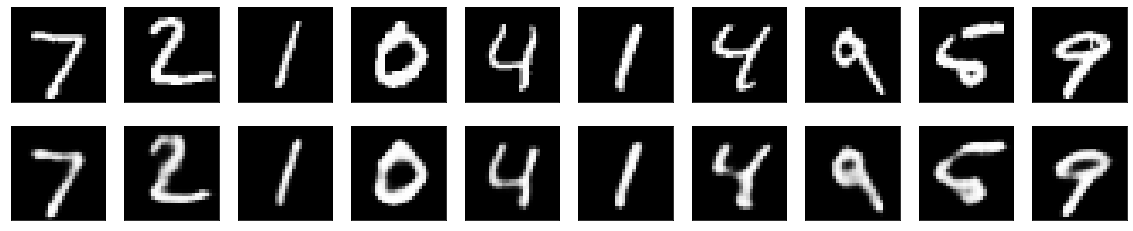

In [ ]:
#결과 확인

decoded_imgs = autoencoder.predict(conv_x_test)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, 10, i+1)
    plt.imshow(x_test[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

#결과 해상도가 많이 좋아진 것으로 볼 수 있다

## 원본에 잡음을 섞은 후 다시 복원해보기

In [ ]:
#잡음 넣기

noise_facter = 1
x_train_noisy = conv_x_train + noise_facter * np.random.normal(loc=0.0, scale=1.0, size=conv_x_train.shape)  #정규분포를 따르는 난수값을 위 noise_facter로 0.5를 섞어서 원래 데이터에 넣는다, loc=평균,  scale= 표준편차
x_test_noisy = conv_x_test + noise_facter * np.random.normal(loc=0.0, scale=1.0, size=conv_x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)  #평균이 0, 표준편차가 1인 값을 뽑는다 = 값의 범위가 0~1사이로 유지됨
x_test_noisy= np.clip(x_test_noisy, 0.0, 1.0)

<Figure size 432x288 with 0 Axes>

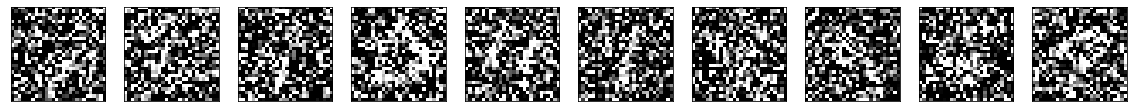

In [ ]:
#다시 10개씩 출력해보기

plt.gray()
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# 모델 생성
input_img = Input(shape=(28,28,1))
x = Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same')(input_img)
x = MaxPool2D(pool_size=(2,2), padding='same')(x)
x = Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same')(x)
encoded = MaxPool2D(pool_size=(2,2), padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)  # MaxPool과 반대되는 개념(각 값별로 크기 늘려줌)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

In [ ]:
#입력데이터는 잡음이 껴있는 데이터를 주고 정답은 깨끗한 데이터로 학습시키기

fit_hist = autoencoder.fit(x_train_noisy, conv_x_train, epochs=100, batch_size=128, validation_data=(x_test_noisy, conv_x_test))

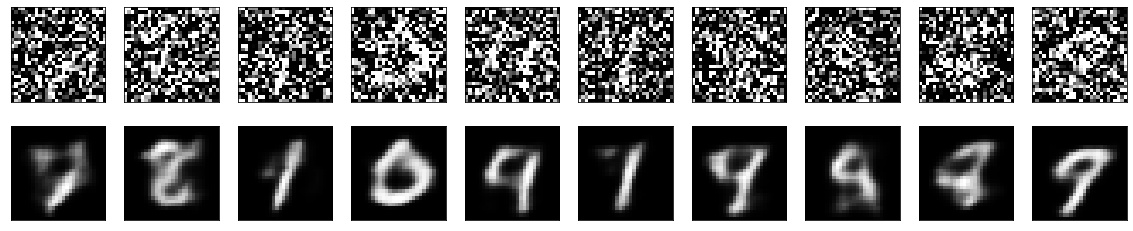

In [ ]:
# 결과 확인
decoded_imgs = autoencoder.predict(x_test_noisy)
n = 10
plt.figure(figsize=(20,4))
plt.gray()
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

원본 데이터 50에포크 0.0903  
잡음 데이터 100에포크 0.1176

In [ ]:
#이미지로 표현

plt.plot(fit_hist.history['loss'])
plt.plot(fit_hist.history['val_loss'])